# Introduction
## What is Customer Churn?
Customer churn or customer attrition is the measure of the percentage of customers that stopped doing business or using a company's service during a certain time frame.
The number is simply calculated by dividing the number of customers lost during a certain time period over the number of customers at the beginning of that time period.

## Why is it important?
In most businesses, it is less expensive to retain existing customers than gaining new customers in place of churned customers. This is because earning business from new customers means working leads all the way through the sales funnel, utilizing your marketing and sales resources throughout the process. Customer retention, on the other hand, is generally more cost-effective as you’ve already earned the trust and loyalty of existing customers.

# Dataset Overview
We are working with a kaggle dataset [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) containing information about 7,043 customers and if they are still in service with the company.

| Attribute | Description |
|:-|:-|
| customerId | Customer Id |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

In [1]:
#loading libraries
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import timeit

%matplotlib inline

In [2]:
#load data
data = pd.read_csv(r"../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The number of enteries are 7043 with no NAN (for now), and we have 21 attributes including the ID.
Most of the attributes have the wrong type, we should assign them the right data type to avoid problems down the line.

In [4]:
#Unique values in each attribute
for item in data.columns:
    print(f"Unique {item}'s count: {data[item].nunique()}")
    print(f"{data[item].unique()}\n\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique gender's count: 2
['Female' 'Male']


Unique SeniorCitizen's count: 2
[0 1]


Unique Partner's count: 2
['Yes' 'No']


Unique Dependents's count: 2
['No' 'Yes']


Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Unique PhoneService's count: 2
['No' 'Yes']


Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']


Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']


Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']


Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']


Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']


Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']


Unique 

## Data Cleaning & Transformation

In [5]:
catCols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", 
           "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
           "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
data[catCols] = data[catCols].astype('category') # change columns to type category

data["tenure"] = data["tenure"].astype('int64') # change columns to type int64

# Converting totalcharges column to float gives an error, lets find out why
# data["TotalCharges"] = data["TotalCharges"].astype('float64') # change columns to type float64


While converting the attribute data types to categories and `int64`, it works well, but we get an error when assigning type `float64` to `TotalCharges`

In [6]:
tCharges = data.sort_values('TotalCharges')
tCharges['TotalCharges'].head(20)

936            
3826           
4380           
753            
5218           
3331           
6754           
6670           
1340           
488            
1082           
105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
Name: TotalCharges, dtype: object

We see that 11 values are empty strings (they didnt show as NA's earlier). And looking at the columns, it seems the missing values are arbitrary. So rather than imputing zeros, we will remove the entire rows as it's only 0.15% of the entire data.

In [7]:
#convert empty strings to NAN (actually there is one space)
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#remove nulls and reset index
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

#convert to float64
data["TotalCharges"] = data["TotalCharges"].astype(float)

We notice that some of the attributes have redundant values like MultipleLines with `No` and `No phone service`, we can combine those to make it easier for the classifier down the line.

In [8]:
colsForReplacement = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for colName in colsForReplacement:
    data[colName] = data[colName].replace({'No internet service' : 'No'})

And for SeniorCitizen column, we should convert it to `Yes` and `No` to maintain consistency.

In [9]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [10]:
#lets convert the types again as we did alot of changes and they reverted back to `object` type
catCols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "OnlineSecurity", 
           "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "MultipleLines",
           "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
data[catCols] = data[catCols].astype('category') # change columns to type category

# Converting totalcharges column to float gives an error, lets find out why
data["TotalCharges"] = data["TotalCharges"].astype('float64') # change columns to type float64

# data["Churn"] = data["Churn"].astype('bool')

## Exploratory Analysis
### Outlier Detection

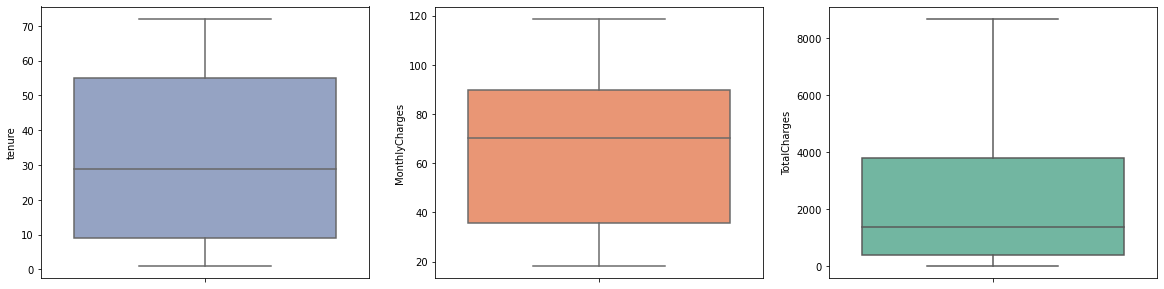

In [11]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(131)
sns.boxplot(data=data, y="tenure", color="#8da0cb")
sns.color_palette("BuGn_r")
fig.add_subplot(132)
sns.boxplot(data=data, y="MonthlyCharges", color="#fc8d62")

fig.add_subplot(133)
sns.boxplot(data=data, y="TotalCharges", color="#66c2a5")

Looking at the boxplots, we can see that there are no outliers in the numerical variables in our dataset.

### Customer Service Distrubtion

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.35)

for i, item in enumerate(services, 1):
    fig.add_subplot(3,3,i)
    plt.title(f'{item} Counts', fontsize=17)
    sns.countplot(data=data, x=item)


### Customer Churn in Categorical Variables

In [ ]:
#split churned and didnt churn
churn = data[data['Churn']=='Yes']
no_churn = data[data['Churn']=='No']

#Separating catagorical, numerical, target & id columns
id_col = ['customerID']
target_col = ['Churn']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols   = [x for x in data.columns if x not in num_cols + ['Churn', 'customerID']]

In [ ]:
#function to plot count barcharts for all categorical attributes
def drawBar(churn, no_churn, column):  
    fig = plt.figure(figsize=(13,4.5))
    plt.subplots_adjust(hspace=0.25)
    
    def bar_subplot(is_churn=True):
        #assign variables based on is_churn
        data, plot = [churn, '121'] if is_churn else [no_churn, '122']
        title = f'Churn - {column}' if is_churn else f'No Churn - {column}'
        data_vals = data[column].value_counts().sort_values()
        
        fig.add_subplot(plot)
        plt.title(title, fontsize=17)
        if(column == 'PaymentMethod'): plt.xticks(rotation=20)
        for i, item in enumerate(data_vals):
            plt.text(i, item+data_vals.max()*.018, "{:0.2f}%".format(item/data_vals.sum()*100), 
                     horizontalalignment='center', verticalalignment='center',color='black')
        sns.countplot(data=data, x=column, order=data[column].value_counts(ascending=True).index)
    
    bar_subplot(True)
    bar_subplot(False)    

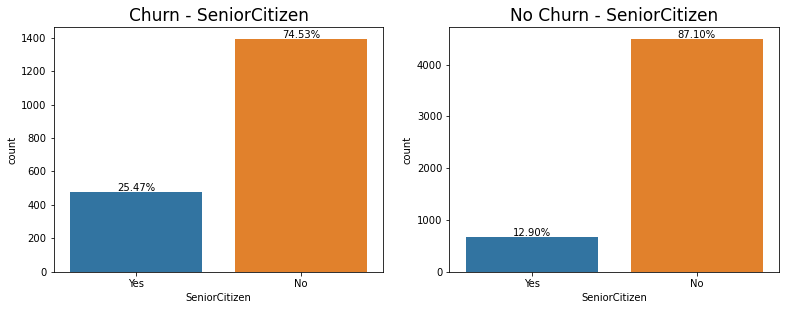

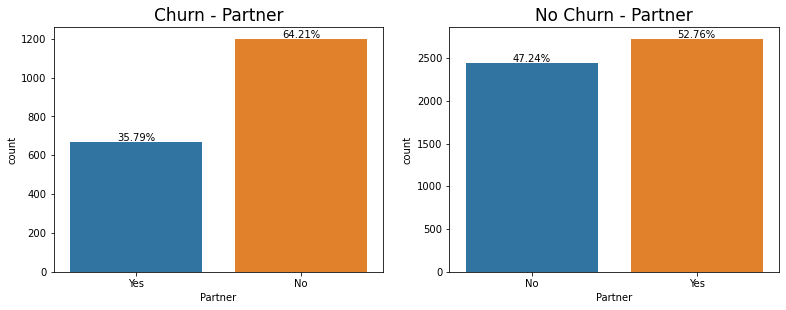

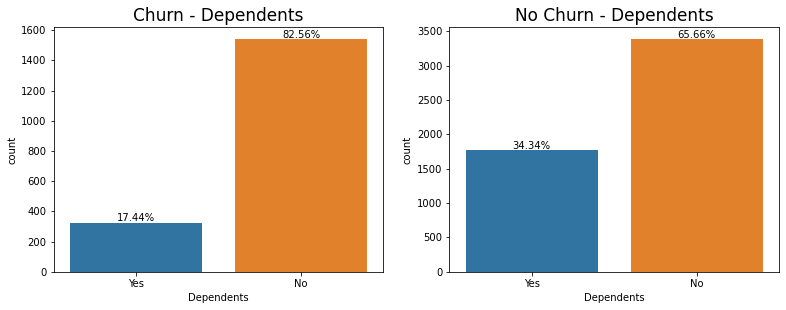

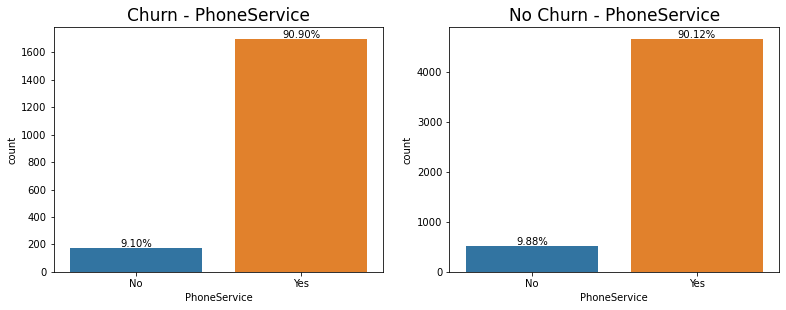

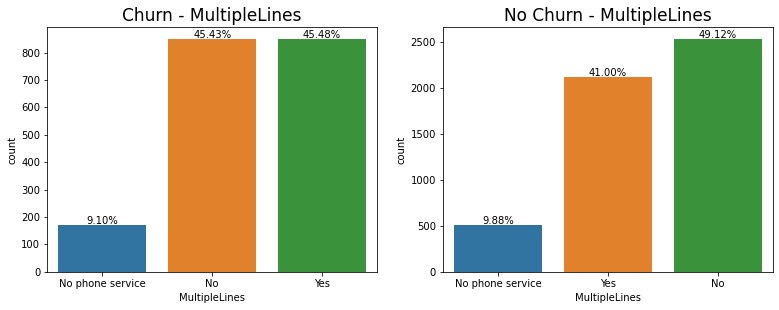

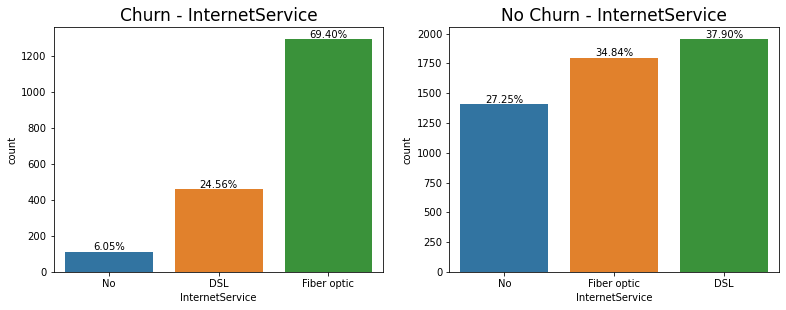

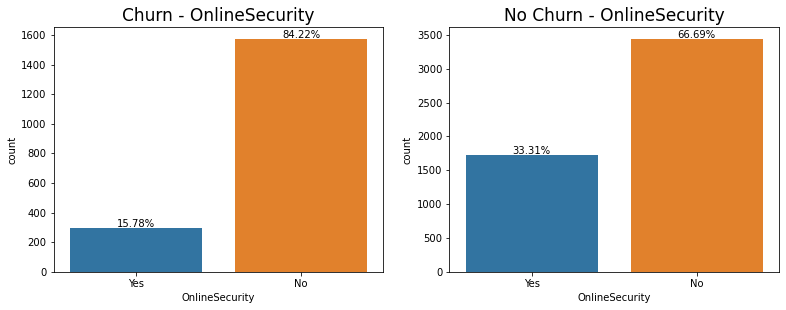

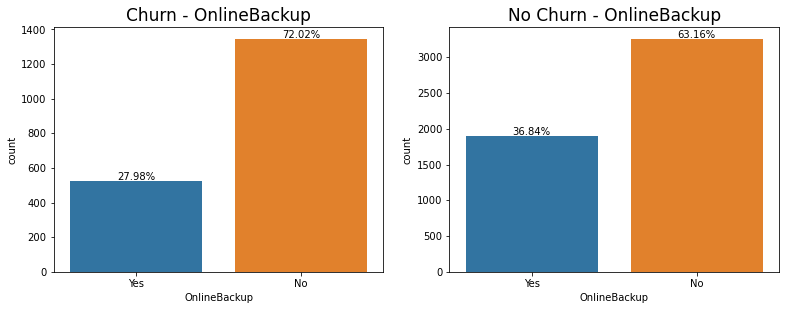

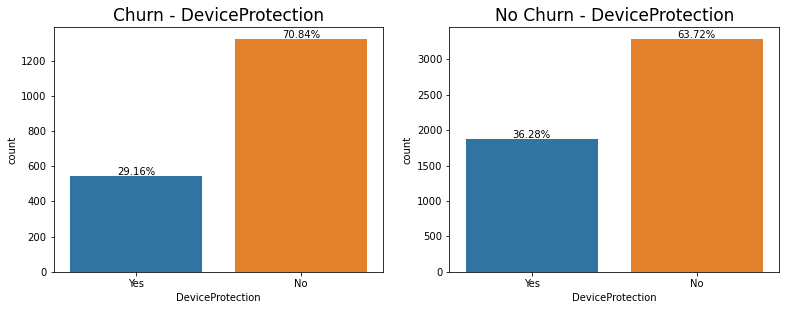

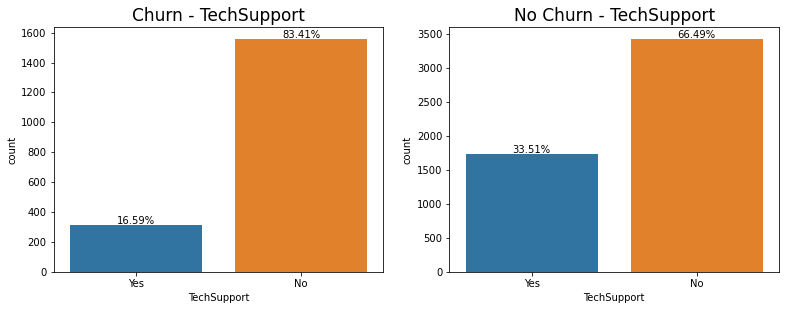

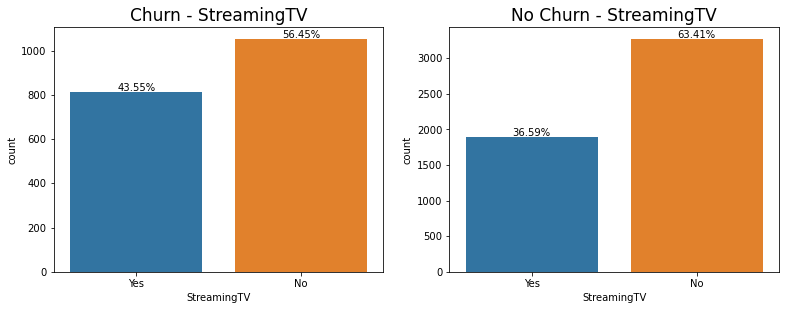

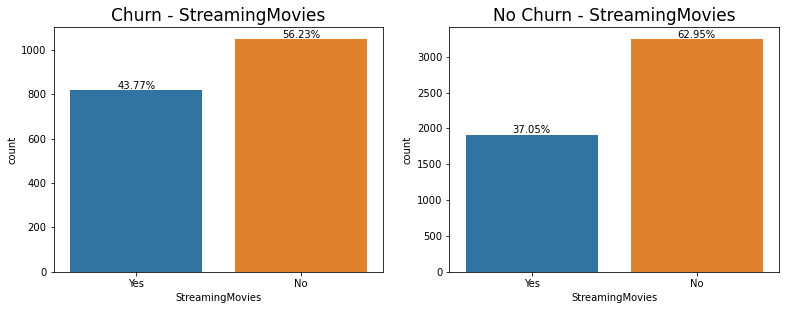

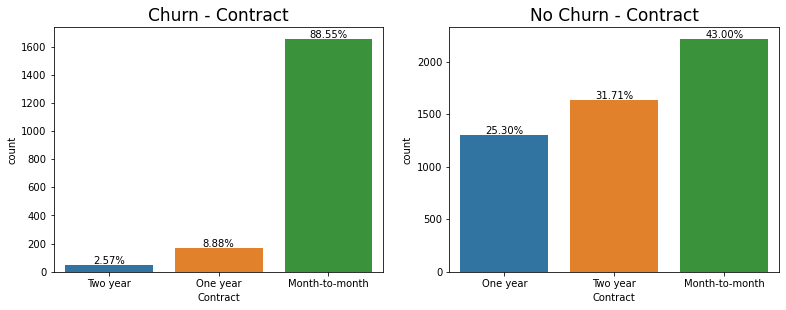

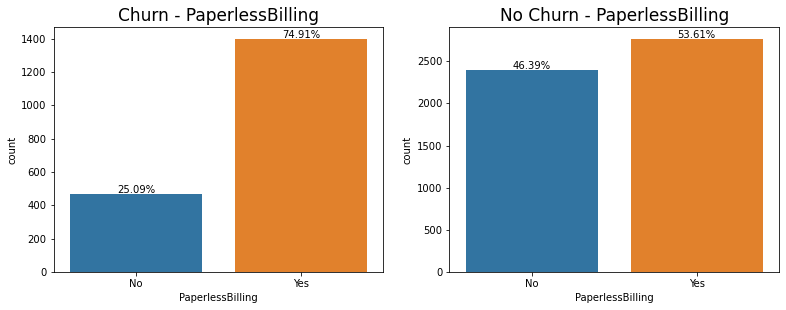

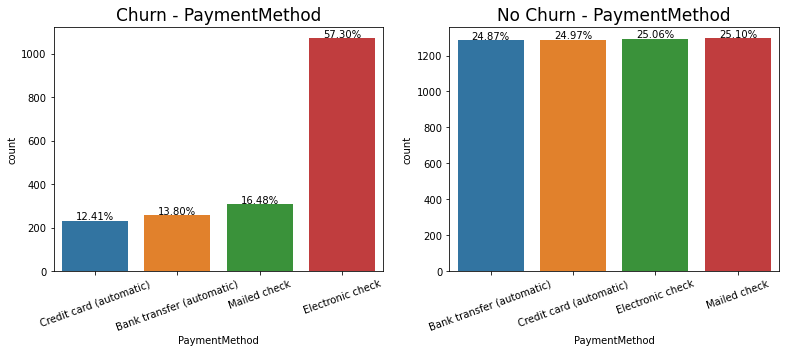

In [15]:
#plot counts of churned and didnt churn
total_churn_vals = data['Churn'].value_counts().sort_values()

plt.figure(figsize=(13,4.5))
plt.title('Total Customer Churn', fontsize=17)
plt.text(0,total_churn_vals[0]+80, "{:0.2f}%".format(total_churn_vals[0]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
plt.text(1,total_churn_vals[1]+80 , "{:0.2f}%".format(total_churn_vals[1]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
# plt.axis('off')
sns.countplot(data=data, x='Churn')

#Plot all catagorical variables distribution
for colName in cat_cols:
    drawBar(churn, no_churn, colName)

### Customer Churn in Numerical Variables

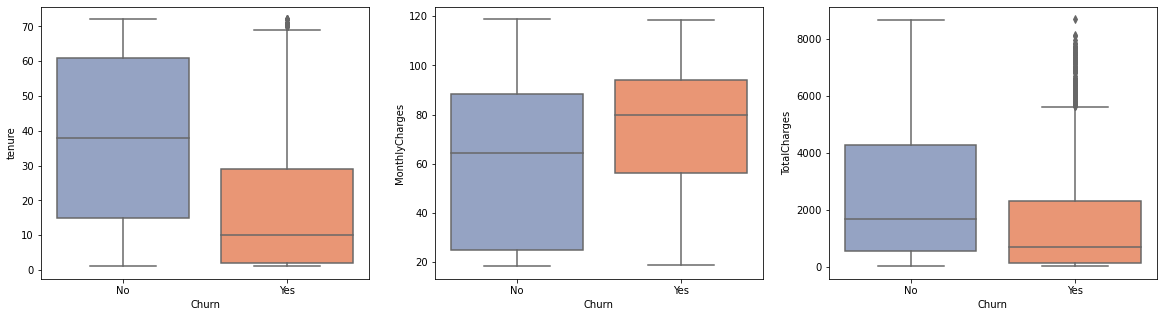

In [16]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(131)
sns.boxplot(data=data, x="Churn", y="tenure", palette=["#8da0cb", "#fc8d62"])

fig.add_subplot(132)
sns.boxplot(data=data, x="Churn", y="MonthlyCharges", palette=["#8da0cb", "#fc8d62"])

fig.add_subplot(133)
sns.boxplot(data=data, x="Churn", y="TotalCharges", palette=["#8da0cb", "#fc8d62"])

Insights from the boxplots:
* For tenure, we notice that the median for churned customers is about 10 months.
* For monthly charges, churned customers had higher monthly charges than the retained customers, with a median of 80.
* For total charges: churned customers had lower total charges than retained customers.

Based on the insights, since customers tend to have a shorter tenure when their monthly charges are higher, it affects their total charges. This is reflected by the lower total charges for the churned customers.

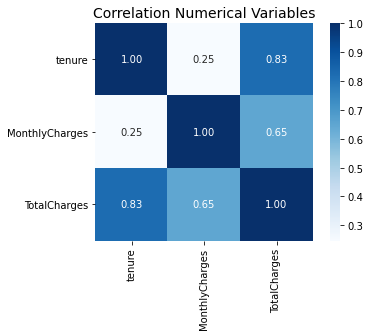

In [17]:
numCorr = data[num_cols].corr()
plt.title('Correlation Numerical Variables', fontsize=14)
sns.heatmap(numCorr, annot=True, square=True,fmt='.2f', cmap = 'Blues')

TotalCharges is positively correlated with MonthlyCharges and tenure.

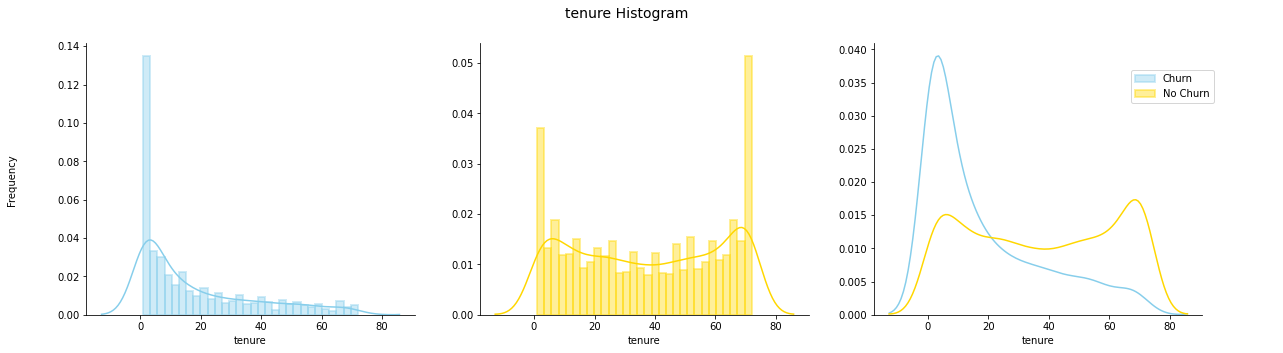

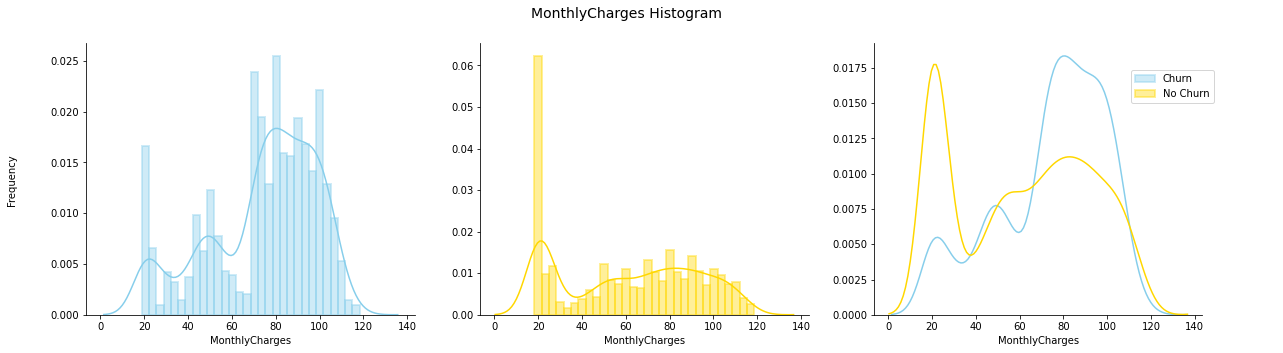

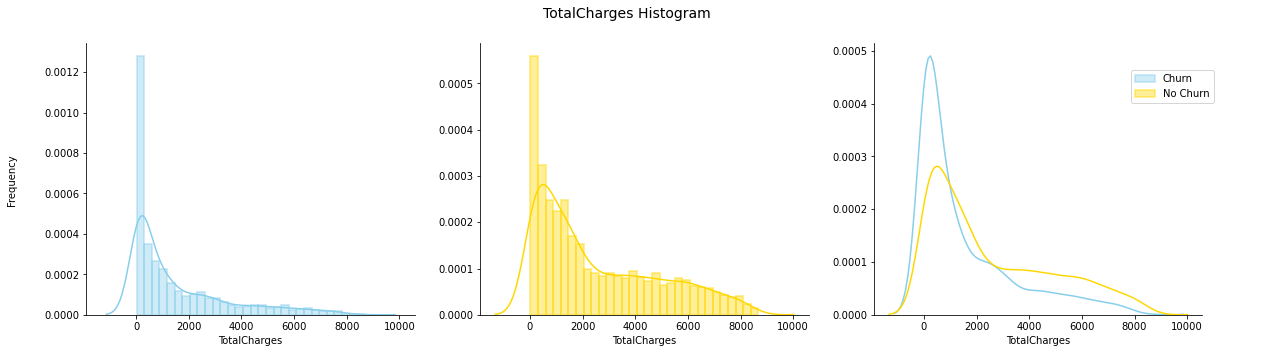

In [18]:
def plot_dist(churn, no_churn, attr):
    f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True) 
    ax1=sns.distplot(churn[attr] , color="skyblue", ax=axes[0], bins=30,
                     hist_kws=dict(edgecolor="skyblue", linewidth=2)) 

    ax2=sns.distplot(no_churn[attr] , color="gold", ax=axes[1], bins=30,
                     hist_kws=dict(edgecolor="gold", linewidth=2))

    ax3=sns.kdeplot(churn[attr] , color="skyblue", ax=axes[2], legend=False)
    ax3=sns.kdeplot(no_churn[attr] , color="gold", ax=axes[2], legend=False)
    ax3.set_xlabel(attr)
    
    sns.despine(top=True, right=True)
    f.text(0.07, 0.5, 'Frequency', va='center', rotation='vertical')
    f.suptitle(f'{attr} Histogram', fontsize=14)
    f.legend(labels=['Churn','No Churn'], loc=1, borderaxespad=7)

plot_dist(churn, no_churn, "tenure")
plot_dist(churn, no_churn, "MonthlyCharges")
plot_dist(churn, no_churn, "TotalCharges")

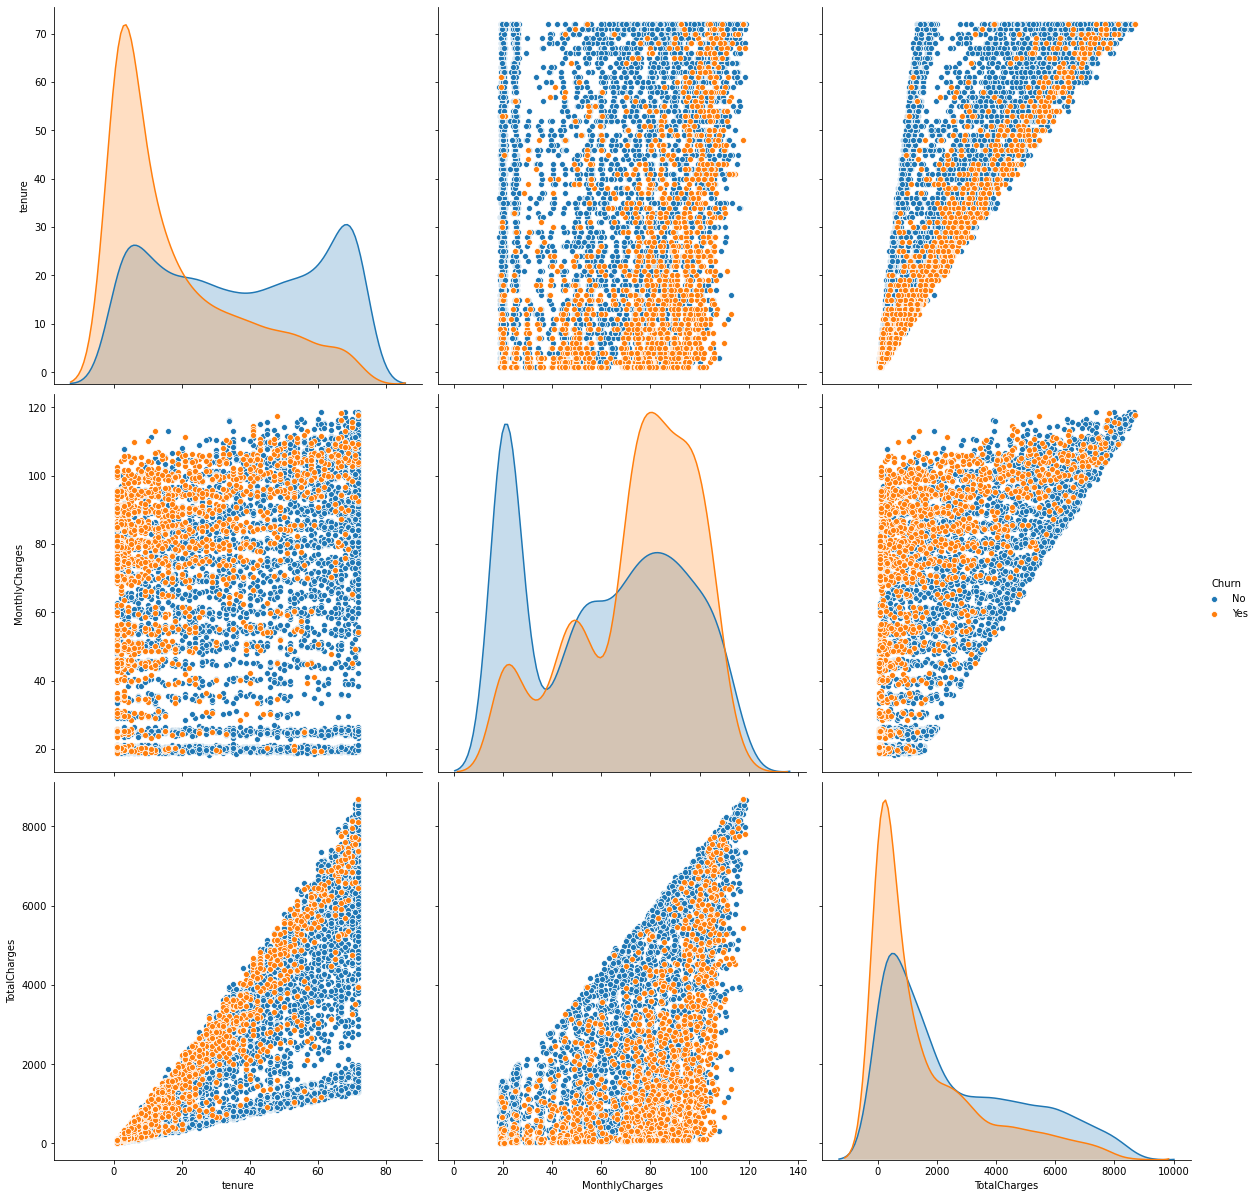

In [19]:
sns.pairplot(data[num_cols+["Churn"]], hue="Churn", height=5.5,diag_kind="kde")

### Customer Churn based on tenure
Based on the plots we have seen so far, there is a big indiction that tenure strongly correlates with Churn, so we need to break it down further

In [20]:
#break tenure by 12 month margins (yearly)
replace_tenure = [(range(0,12), '0-12'),(range(12,24), '12-24'),(range(24,48), '24-48'),(range(48,60), '48-60'),(range(60,73), '60+')]
data["grouped_tenure"] = data['tenure']
for i, x in replace_tenure:
    data["grouped_tenure"].replace(i, x, inplace=True)

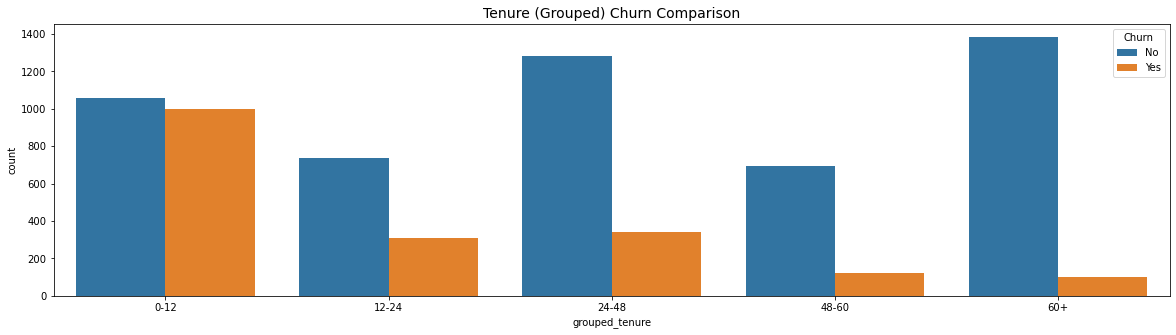

In [21]:
plt.figure(figsize=(20,5))
plt.title('Tenure (Grouped) Churn Comparison', fontsize=14)
sns.countplot(data=data, x='grouped_tenure',hue='Churn', order=sorted(data['grouped_tenure'].value_counts().index))

From the barchart, we can deduce that the number of people churning increases the shorter their tenure is.

In [22]:
avg_tenure_group = data.groupby(["grouped_tenure","Churn"])[["MonthlyCharges","TotalCharges"]].mean().reset_index()
avg_tenure_group

,grouped_tenure,Churn,MonthlyCharges,TotalCharges
0,0-12,No,46.744098,243.739754
1,0-12,Yes,66.088388,265.190340
2,12-24,No,53.617751,939.907520
3,12-24,Yes,78.134304,1293.566019
4,24-48,No,60.826148,2153.233619
5,24-48,Yes,84.308260,2904.633186
6,48-60,No,66.560402,3567.163199
7,48-60,Yes,87.725203,4673.584146
8,60+,No,74.352637,5049.314812
9,60+,Yes,96.912626,6452.205556


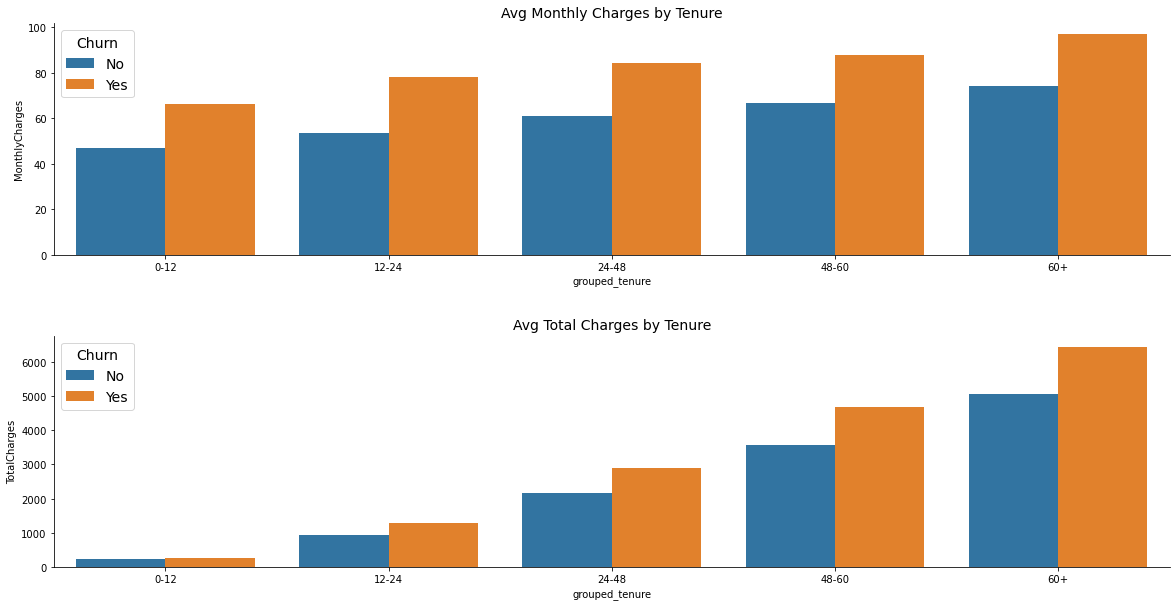

In [23]:
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.35)


fig.add_subplot(211)
plt.title('Avg Monthly Charges by Tenure', fontsize=14)
sns.barplot(data=avg_tenure_group, x='grouped_tenure',y='MonthlyCharges',hue='Churn', 
            order=sorted(avg_tenure_group['grouped_tenure'].value_counts().index))
plt.legend(fontsize=14, title_fontsize=14, title ='Churn')

fig.add_subplot(212)
plt.title('Avg Total Charges by Tenure', fontsize=14)
sns.barplot(data=avg_tenure_group, x='grouped_tenure',y='TotalCharges',hue='Churn', 
            order=sorted(avg_tenure_group['grouped_tenure'].value_counts().index))
plt.legend(fontsize=14, title_fontsize=14, title ='Churn')

sns.despine()

## Data Preprocessing

In [24]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,grouped_tenure
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,24-48
7028,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,60+
7029,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12
7030,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Add grouped tenure to cat_cols
if ('grouped_tenure' not in cat_cols):
    cat_cols.append('grouped_tenure')
    
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns between 0,1
# scaled = MinMaxScaler(feature_range = (0,1))
# scaled.fit(data[num_cols])
# scaled = pd.DataFrame(scaled.transform(data[num_cols]),columns=num_cols)

#Scaling Numerical columns with mean 0 (better accuracy than MinMaxScaler)
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

## Modelling

In [58]:
def data_prediction_plot(logit,train_x,test_x,train_y,test_y, cols, cf = 'coefficients'):
    logit.fit(train_x,train_y.values.ravel())
    predictions   = logit.predict(test_x)
    probabilities = logit.predict_proba(test_x)
    
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(logit.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(logit.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

    print(f'{logit}\n\nClassification report:\n{classification_report(test_y,predictions)}')
    print(f'\nAccuracy Score: {accuracy_score(test_y,predictions)}')

    #Plot confusion matrix
    plot_confusion_matrix(logit, test_x, test_y, cmap=plt.cm.Reds)
    plt.grid(False)

    # Plot feature importance bar
    # Prepare Data
    coef_sumry.reset_index(inplace=True)
    coef_sumry['colors'] = ['red' if x < 0 else 'green' for x in coef_sumry['coefficients']]
    coef_sumry

    # Draw plot
    plt.figure(figsize=(14,10), dpi= 80)
    plt.hlines(y=coef_sumry.index, xmin=0, xmax=coef_sumry.coefficients, color=coef_sumry.colors, alpha=0.4, linewidth=5)

    # Decorations
    plt.gca().set(ylabel='$Features$', xlabel='$Coefficients$')
    plt.yticks(coef_sumry.index, coef_sumry.features, fontsize=12)
    plt.title('Feature Importance', fontdict={'size':20})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

## Baseline Model

LogisticRegression(solver='liblinear')

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1294
           1       0.67      0.52      0.59       464

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758


Accuracy Score: 0.8065984072810012


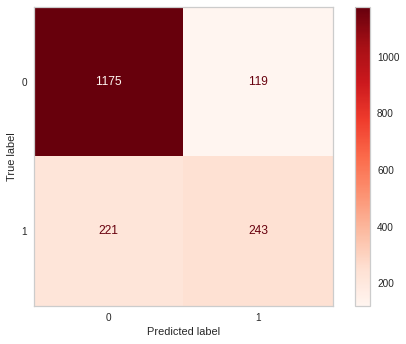

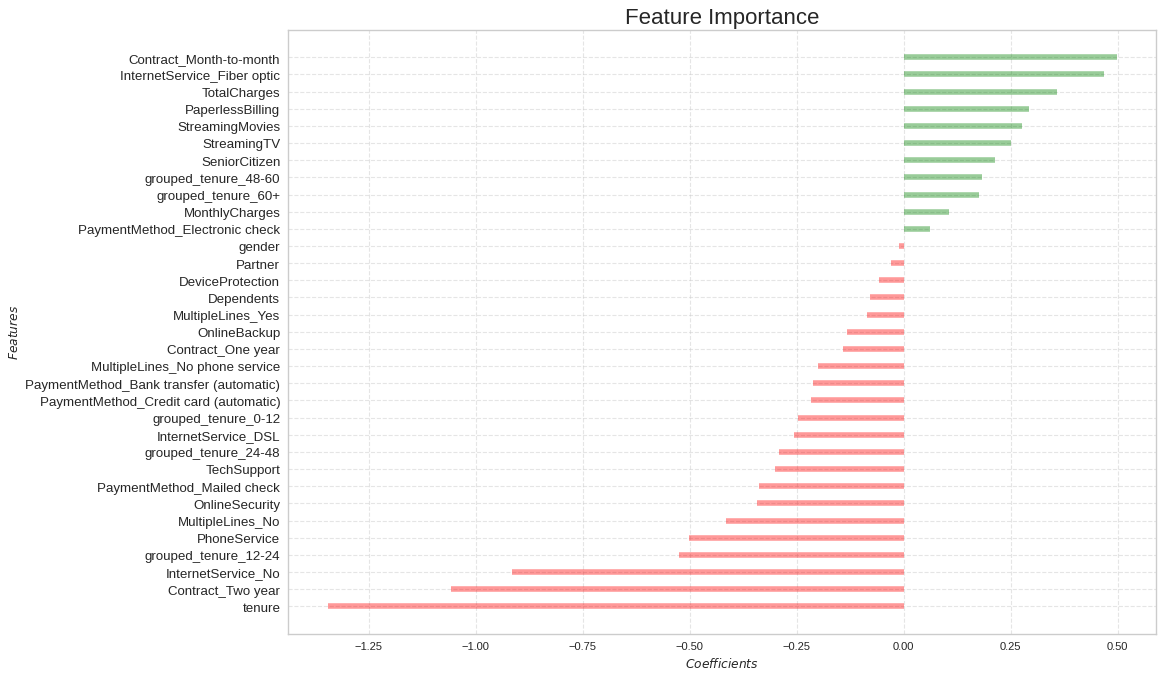

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,scorer,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold


#seperating dependent and independent variables
cols    = [i for i in data.columns if i not in id_col + target_col]

#split train and test data
train,test = train_test_split(data,test_size = .25 ,random_state = 1)

train_x = train[cols]
train_y = train[target_col]
test_x = test[cols]
test_y = test[target_col]

logit  = LogisticRegression(C=1.0, max_iter=100, solver='liblinear')

data_prediction_plot(logit,train_x,test_x,train_y,test_y, cols)

### Synthetic Minority Oversampling TEchnique (SMOTE)

LogisticRegression(solver='liblinear')

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1294
           1       0.58      0.73      0.65       464

    accuracy                           0.79      1758
   macro avg       0.74      0.77      0.75      1758
weighted avg       0.81      0.79      0.80      1758


Accuracy Score: 0.7889647326507395


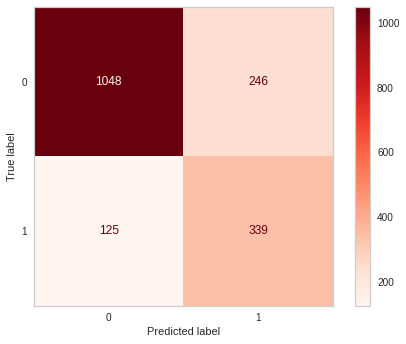

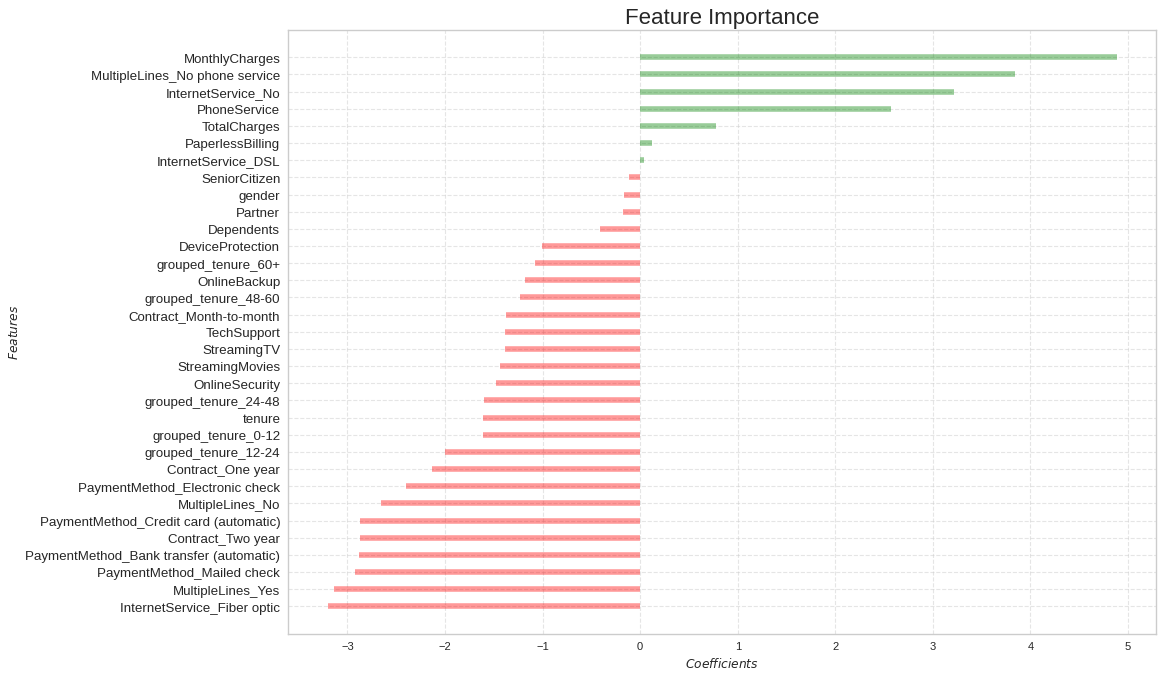

In [39]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in data.columns if i not in id_col+target_col]

train,test = train_test_split(data,test_size = .25 ,random_state = 1)

smote_train_x = train[cols]
smote_train_y = train[target_col]
smote_test_x = test[cols]
smote_test_y = test[target_col]

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_x,os_smote_y = os.fit_sample(smote_train_x,smote_train_y)
os_smote_x = pd.DataFrame(data = os_smote_x,columns=cols)
os_smote_y = pd.DataFrame(data = os_smote_y,columns=target_col)
###

logit_smote = LogisticRegression(C=1.0, max_iter=100, solver='liblinear')

data_prediction_plot(logit_smote,os_smote_x,smote_test_x,os_smote_y,smote_test_y, cols)

### Recursive Feature Elimination

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1294
           1       0.48      0.75      0.58       464

    accuracy                           0.72      1758
   macro avg       0.68      0.73      0.68      1758
weighted avg       0.78      0.72      0.73      1758


Accuracy Score: 0.7178612059158134


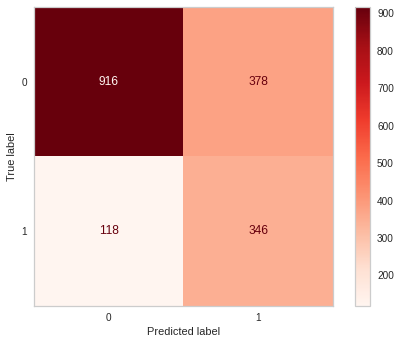

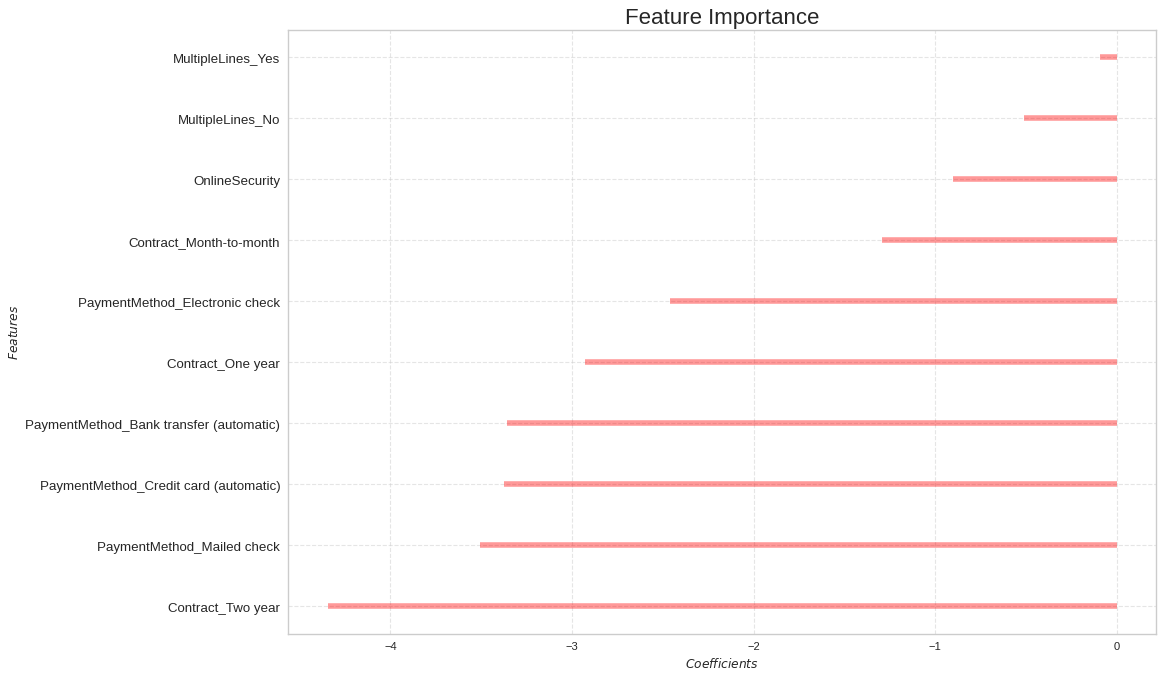

In [42]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_x,os_smote_y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in data.columns if i not in id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_x = os_smote_x[cols]
train_rf_y = os_smote_y
test_rf_x  = test[cols]
test_rf_y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
data_prediction_plot(logit_rfe,train_rf_x,test_rf_x,train_rf_y,test_rf_y, cols)


### Random Forest Classifier

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(criterion='entropy', max_depth=2)

Classification report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1294
           1       0.00      0.00      0.00       464

    accuracy                           0.74      1758
   macro avg       0.37      0.50      0.42      1758
weighted avg       0.54      0.74      0.62      1758


Accuracy Score: 0.7360637087599545


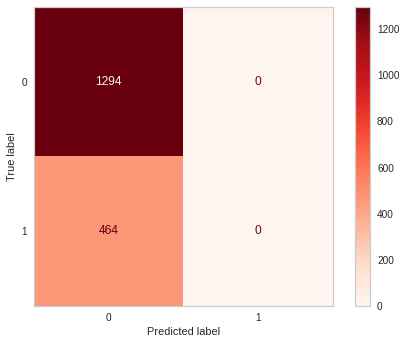

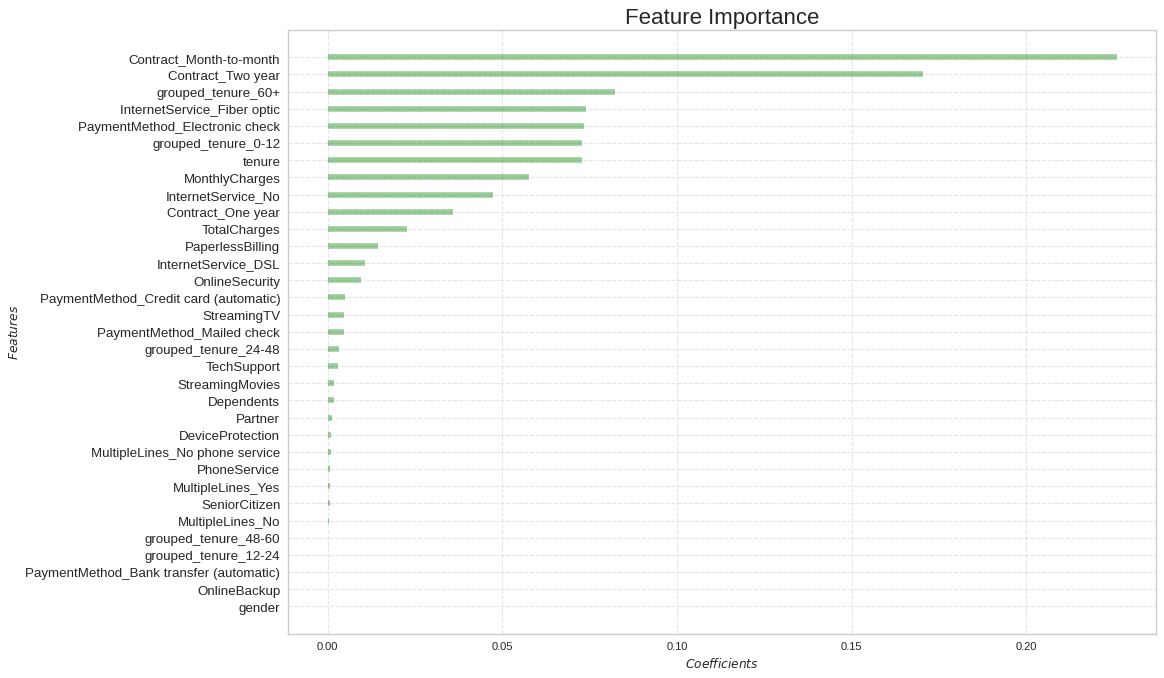

In [59]:
from sklearn.ensemble import RandomForestClassifier

cols = [i for i in data.columns if i not in id_col + target_col]
rf_x     = data[[i for i in cols if i not in target_col]]
rf_y     = data[target_col]

#random forest classifier
rfc   = RandomForestClassifier(n_estimators = 100,max_depth = 2,criterion = "entropy")
rfc.fit(rf_x,rf_y)

data_prediction_plot(rfc, rf_x,test_x[cols], rf_y,test_y, cols,"features")
